## Kuvaillaan tunnusluvuin ja graafisesti Qt:n osakekurssia viime vuosina

## Testataan joitain lineaarisen regression oletuksia Qt:n osakekurssiin

Haetaan Yahoo Finance -palvelusta indeksin HEX25 kurssihistoria vuoden 2018 alusta alkaen ja osakkeen Qt kurssihistoria samalta ajalta.


In [1]:
### Tuodaan kirjastot
import pandas as pd
import pandas_datareader.data as web

In [2]:
### Avataan tiedostot
markkinat = web.DataReader('^OMXH25', start = '2018-1-1', data_source = 'yahoo')
osake = web.DataReader('QTCOM.HE', start = '2018-1-1', data_source = 'yahoo')

In [3]:
markkinat

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,3932.649902,3905.439941,3919.610107,3930.169922,0.0,3930.169922
2018-01-03,3970.540039,3931.169922,3931.169922,3963.760010,0.0,3963.760010
2018-01-04,4002.389893,3967.239990,3967.239990,3994.840088,0.0,3994.840088
2018-01-05,4018.459961,3991.110107,3992.520020,4018.409912,0.0,4018.409912
2018-01-08,4040.300049,4018.840088,4018.840088,4030.280029,0.0,4030.280029
...,...,...,...,...,...,...
2021-04-12,5036.060059,4983.859863,5024.120117,4985.689941,0.0,4985.689941
2021-04-13,5022.529785,4989.229980,4989.229980,5010.060059,0.0,5010.060059
2021-04-14,5018.060059,4986.270020,5017.200195,5003.870117,0.0,5003.870117


In [4]:
osake

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,5.320000,5.200000,5.200000,5.260000,4575,5.260000
2018-01-03,5.540000,5.000000,5.000000,5.440000,793236,5.440000
2018-01-04,6.500000,5.440000,5.440000,6.000000,19717,6.000000
2018-01-05,6.000000,5.700000,6.000000,5.780000,5228,5.780000
2018-01-08,5.960000,5.400000,5.800000,5.640000,16906,5.640000
...,...,...,...,...,...,...
2021-04-12,98.599998,95.699997,98.599998,98.199997,92678,98.199997
2021-04-13,104.400002,98.199997,98.400002,102.199997,119237,102.199997
2021-04-14,104.199997,100.199997,104.000000,102.000000,79679,102.000000


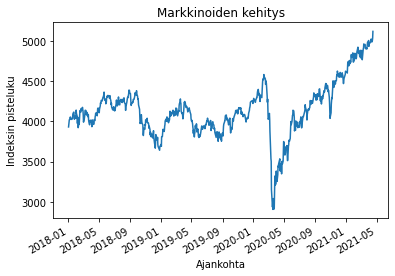

In [5]:
#### Tehdään kuvio markkinoista
markkinat['Close'].plot(title = "Markkinoiden kehitys", xlabel = "Ajankohta", ylabel = "Indeksin pisteluku")

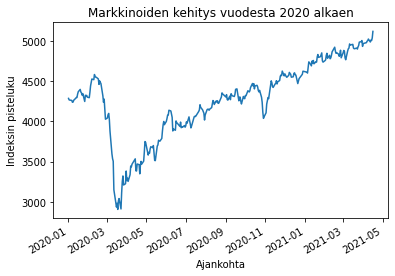

In [6]:
#### Tehdään kuvio vuoden 2020 alusta alkaen
markkinat['Close']['2020-01-01':].plot(title = "Markkinoiden kehitys vuodesta 2020 alkaen", xlabel = "Ajankohta", ylabel = "Indeksin pisteluku")

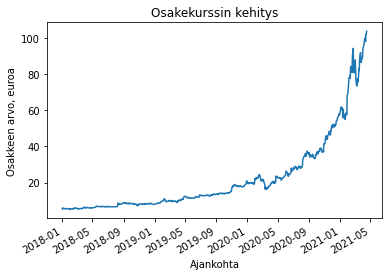

In [7]:
#### Tehdään kuvio osakkeen päätöskurssista
osake['Close'].plot(title = "Osakekurssin kehitys", xlabel = "Ajankohta", ylabel = "Osakkeen arvo, euroa")

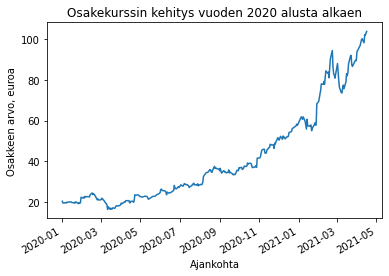

In [8]:
#### Tehdään kuvio osakkeen päätöskurssista vuoden 2020 alusta alkaen
osake['Close']['2020-1-1':].plot(title = "Osakekurssin kehitys vuoden 2020 alusta alkaen", xlabel = "Ajankohta", ylabel = "Osakkeen arvo, euroa")

Lasketaan seuraavaksi päätöskurssien tunnuslukuja.

In [9]:
#### Markkinaindeksin päätöskurssin tunnusluvut
markkinat['Close'].describe()

count     819.000000
mean     4141.740109
std       338.045154
min      2905.760010
25%      3967.510010
50%      4112.939941
75%      4291.454834
max      5117.290039
Name: Close, dtype: float64

In [10]:
#### Siistitään edellistä hieman ja lisätään prosenttipisteitä

markkinat['Close'].describe(percentiles = [.1,.25,.75,.9])

count     819.000000
mean     4141.740109
std       338.045154
min      2905.760010
10%      3809.964014
25%      3967.510010
50%      4112.939941
75%      4291.454834
90%      4576.125977
max      5117.290039
Name: Close, dtype: float64

In [11]:
#### Tehään sama osakkeen arvoille.

osake['Close'].describe(percentiles = [.1,.25,.75,.9])

count    824.000000
mean      22.109357
std       21.248278
min        5.120000
10%        6.160000
25%        8.200000
50%       13.325000
75%       26.450000
90%       52.140001
max      103.800003
Name: Close, dtype: float64

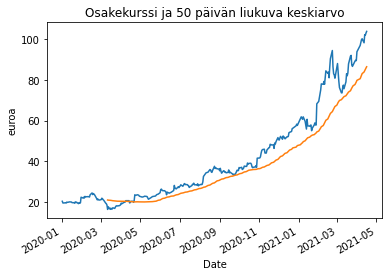

In [12]:
# Piirretään samaan kuvaan kuvio osakkeen päätöskursseista vuoden 2020 alusta ja niiden 50:n havainnon liukuvasta keskiarvosta

osake['Close']['2020-01-01':].plot(title = "Osakekurssi ja 50 päivän liukuva keskiarvo" , ylabel = "euroa")
osake['Close']['2020-01-01':].rolling(50).mean().plot()

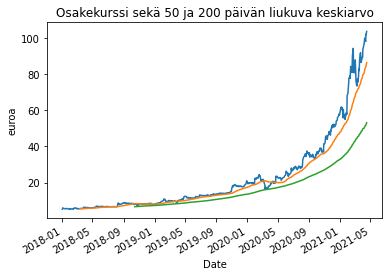

In [13]:
# Piirretään samaan kuvaan kuvio osakkeen päätöskursseista sekä niiden 50:n ja 200:n havainnon liukuvasta keskiarvosta

osake['Close'].plot(title = "Osakekurssi sekä 50 ja 200 päivän liukuva keskiarvo" , ylabel = "euroa")
osake['Close'].rolling(50).mean().plot(label='50pv')
osake['Close'].rolling(200).mean().plot(label='200pv')

Mitä voit sanoa tämän perusteella sanoa osakekurssien kehityksestä?

Onko kultaista tai kuoleman ristiä näkyvissä ja mitä ne tarkoittavat? Ks. [Investopedia](https://www.investopedia.com/ask/answers/121114/what-difference-between-golden-cross-and-death-cross-pattern.asp)

## Lasketaan vielä päivämuutokset.

In [14]:
markkinat['markkinat-paivamuutos%'] = markkinat['Close'].pct_change()
osake['osake-paivamuutos%'] = osake['Close'].pct_change()

In [15]:
muutokset = pd.concat([markkinat['markkinat-paivamuutos%'],osake['osake-paivamuutos%']], axis = 1)
muutokset

,markkinat-paivamuutos%,osake-paivamuutos%
Date,,
2018-01-02,NaN,NaN
2018-01-03,0.008547,0.034220
2018-01-04,0.007841,0.102941
2018-01-05,0.005900,-0.036667
2018-01-08,0.002954,-0.024222
...,...,...
2021-04-12,-0.007264,-0.019960
2021-04-13,0.004888,0.040733
2021-04-14,-0.001236,-0.001957


In [16]:
muutokset.columns

Index(['markkinat-paivamuutos%', 'osake-paivamuutos%'], dtype='object')

In [17]:
muutokset.columns = ['markkinat%','osake%']
muutokset

,markkinat%,osake%
Date,,
2018-01-02,NaN,NaN
2018-01-03,0.008547,0.034220
2018-01-04,0.007841,0.102941
2018-01-05,0.005900,-0.036667
2018-01-08,0.002954,-0.024222
...,...,...
2021-04-12,-0.007264,-0.019960
2021-04-13,0.004888,0.040733
2021-04-14,-0.001236,-0.001957


Tärkeä osa laskelmissa on myös luotettavuuden arviointi. Eri menetelmiä verrataan keskenään vertaamalla niiden luotettavuutta. 

Yksi tällainen käsite on mean absolute deviation.

In [18]:
#### Lasketaan muutosprosenteille poikkeamien keskiarvo

muutokset.mad()

markkinat%    0.008689
osake%        0.018404
dtype: float64

Piirretään vielä peräkkäisiä päivittäisiä prosenttimuutoksia. Ne tehdään pylväskaaviolla.

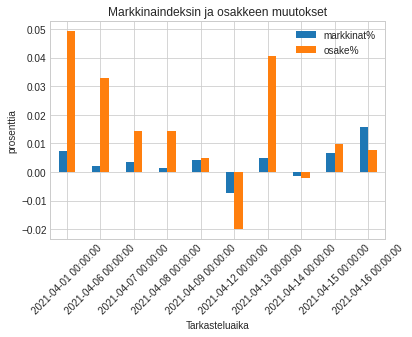

In [38]:
### Piirretään peräkkäiset muutokset viimeisestä kymmenestä havainnosta lähtien.

muutokset[-10:].plot.bar(rot=45, ylabel='prosenttia', xlabel='Tarkasteluaika', title='Markkinaindeksin ja osakkeen muutokset')

### Lineaarinen riippuvuus

Tarkastellaan päivämuutosten lineaarista riippuvuutta.

In [19]:
x_markkinat = muutokset['markkinat%']
y_osake = muutokset['osake%']

In [20]:
### Tuodaan ensin tarvittavat kirjastot
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

Text(0, 0.5, 'osakkeen muutos')

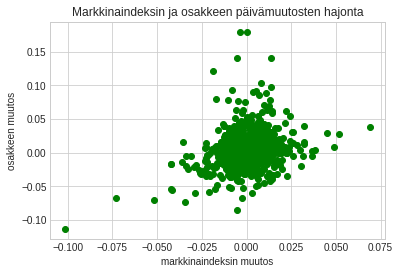

In [21]:
plt.plot(x_markkinat, y_osake, 'o', color = 'green');
plt.title("Markkinaindeksin ja osakkeen päivämuutosten hajonta")
plt.xlabel("markkinaindeksin muutos")
plt.ylabel("osakkeen muutos")

## Normaalijakautuneisuus

Tarkistetaan seuraavaksi normaalijakautuneisuus.

Ensin tarvitaan taas tueksi Pythonin kirjastoja.

In [22]:
#### Tuodaan tarvittava kirjasto ja annetaan sille lempiniim stats
import scipy.stats as stats

Tarkistetaan osakkeen normaalijakautuneisuus.

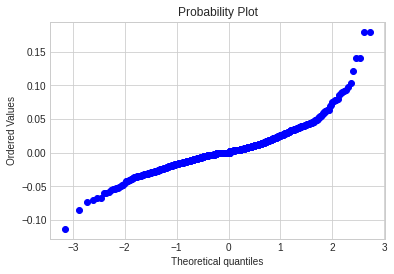

In [23]:
#### Osakkeen normaalijakautuneisuus, käyttäen q-q-plot-kuviota
stats.probplot(y_osake, dist="norm", plot = plt)
plt.show()

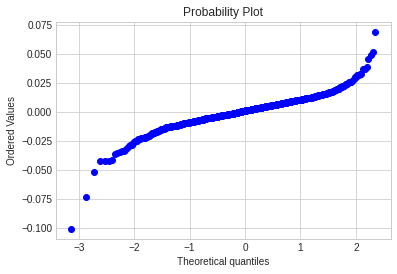

In [24]:
#### Markkinoiden normaalijakautuneisuus, käyttäen q-q-plot-kuviota
stats.probplot(x_markkinat, dist="norm", plot = plt)
plt.show()

## Multikolineaarisuus

Tarkistetaan seuraavaksi multikolineearisuus.

In [25]:
x_markkinat

Date
2018-01-02         NaN
2018-01-03    0.008547
2018-01-04    0.007841
2018-01-05    0.005900
2018-01-08    0.002954
                ...   
2021-04-12   -0.007264
2021-04-13    0.004888
2021-04-14   -0.001236
2021-04-15    0.006649
2021-04-16    0.015912
Name: markkinat%, Length: 825, dtype: float64

In [26]:
y_osake

Date
2018-01-02         NaN
2018-01-03    0.034220
2018-01-04    0.102941
2018-01-05   -0.036667
2018-01-08   -0.024222
                ...   
2021-04-12   -0.019960
2021-04-13    0.040733
2021-04-14   -0.001957
2021-04-15    0.009804
2021-04-16    0.007767
Name: osake%, Length: 825, dtype: float64

In [27]:
#### Luetaan arvot tietokehykseen

df_mkl = pd.concat([x_markkinat,y_osake], axis=1)

df_mkl.columns = ['Markkinat','Osake']

In [28]:
df_mkl

,Markkinat,Osake
Date,,
2018-01-02,NaN,NaN
2018-01-03,0.008547,0.034220
2018-01-04,0.007841,0.102941
2018-01-05,0.005900,-0.036667
2018-01-08,0.002954,-0.024222
...,...,...
2021-04-12,-0.007264,-0.019960
2021-04-13,0.004888,0.040733
2021-04-14,-0.001236,-0.001957


In [29]:
#### Tehdään korrelaatiomatriisi

corr_mkl = df_mkl.corr()

In [30]:
#### Piirretään korrelaatiomatriisi

corr_mkl.style.background_gradient(cmap='coolwarm')

,Markkinat,Osake
Markkinat,1.000000,0.292253
Osake,0.292253,1.000000


Mitä voit tämän perusteella sanoa markkinaindeksin ja osakkeen korrelaatiosta?

Liukuva korrelaatio kertoo, miten kahden osakesarjan muutosprosentit korreloivat eri aikoina.

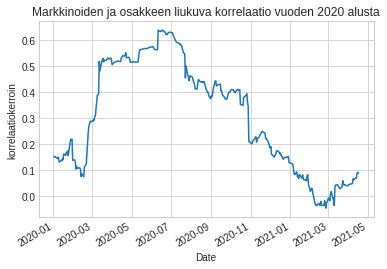

In [31]:
#### Lasketaan ja piirretään vielä osakkeen ja markkinoiden liukuva korrelaatio

liukuva_korrelaatio = df_mkl['Osake'].rolling(90,min_periods=30).corr(df_mkl['Markkinat'])

liukuva_korrelaatio['2020-01-01':].plot(title = "Markkinoiden ja osakkeen liukuva korrelaatio vuoden 2020 alusta", ylabel = "korrelaatiokerroin")

Lasketaan ja piirretään vielä osakkeen ja markkinaindeksin volatiliteetit. 

Kannattaa huomata, että laskentakaavassa volatiliteetti annualisoidaan.

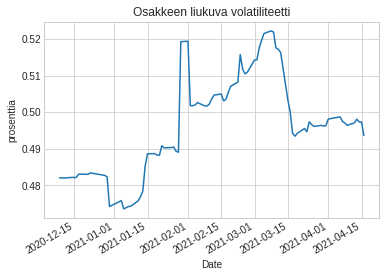

In [32]:
#### Lasketaan osakkeen volatiliteetti ja piirretään se vuoden 2020 alusta alkaen

(df_mkl['Osake'].rolling(252).std()*(252**0.5))

(df_mkl['Osake'].rolling(252).std()*(252**0.5))['2020-01-01':].plot(title = "Osakkeen liukuva volatiliteetti", ylabel = "prosenttia")

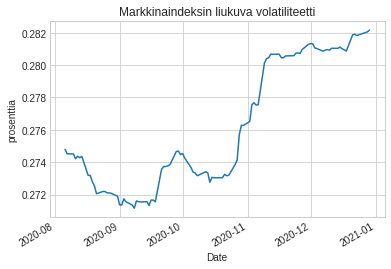

In [33]:
#### Lasketaan markkinoiden volatiliteetti ja piirretään se vuoden 2020 alusta alkaen

(df_mkl['Markkinat'].rolling(252).std()*(252**0.5))

(df_mkl['Markkinat'].rolling(252).std()*(252**0.5))['2020-01-01':].plot(title = "Markkinaindeksin liukuva volatiliteetti", ylabel = "prosenttia")